In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")

pdv.settings.backend = "python_function"


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data(data_filename="real/silver/fibroblast-reprogramming_treutlein.rds")
dataset

{'id': 'real/silver/fibroblast-reprogramming_treutlein',
 'cell_ids': ['1_iN1_C01',
  '1_iN1_C02',
  '1_iN1_C03',
  '1_iN1_C04',
  '1_iN1_C05',
  '1_iN1_C07',
  '1_iN1_C08',
  '1_iN1_C09',
  '1_iN1_C10',
  '1_iN1_C11',
  '1_iN1_C12',
  '1_iN1_C13',
  '1_iN1_C14',
  '1_iN1_C15',
  '1_iN1_C16',
  '1_iN1_C17',
  '1_iN1_C19',
  '1_iN1_C20',
  '1_iN1_C21',
  '1_iN1_C22',
  '1_iN1_C23',
  '1_iN1_C25',
  '1_iN1_C26',
  '1_iN1_C27',
  '1_iN1_C29',
  '1_iN1_C30',
  '1_iN1_C31',
  '1_iN1_C33',
  '1_iN1_C34',
  '1_iN1_C35',
  '1_iN1_C36',
  '1_iN1_C37',
  '1_iN1_C38',
  '1_iN1_C40',
  '1_iN1_C41',
  '1_iN1_C42',
  '1_iN1_C43',
  '1_iN1_C44',
  '1_iN1_C46',
  '1_iN1_C47',
  '1_iN1_C48',
  '1_iN1_C49',
  '1_iN1_C51',
  '1_iN1_C52',
  '1_iN1_C53',
  '1_iN1_C54',
  '1_iN1_C55',
  '1_iN1_C56',
  '1_iN1_C57',
  '1_iN1_C58',
  '1_iN1_C60',
  '1_iN1_C61',
  '1_iN1_C62',
  '1_iN1_C64',
  '1_iN1_C66',
  '1_iN1_C67',
  '1_iN1_C68',
  '1_iN1_C69',
  '1_iN1_C70',
  '1_iN1_C71',
  '1_iN1_C72',
  '1_iN1_C73',
 

In [3]:
# 2. 选择方法(method)
methods_selected = pdv.methods.ti_mst()
logger.info(f"Methods {methods_selected} selecting finished")

[2025年02月12日 21时02分17秒] INFO     backend: python_function                                                    
                        INFO     Methods {'method': {'id': 'mst', 'name': 'MST', 'source': 'offtheshelf',          
                                 'platform': 'R'}, 'wrapper': {'type': 'dimred_projection', 'topology_inference':  
                                 'free', 'trajectory_types': ['linear', 'bifurcation', 'convergence',              
                                 'multifurcation', 'tree'], 'input_required': 'expression', 'inputs':      input_id
                                 required        type                                                              
                                 0  expression      True  expression                                               
                                 1      dimred     False   parameter                                               
                                 2        ndim     False   parameter}, 'contai

In [4]:
# 3. 运行方法(wrap)
model = pdv.wrap.infer_trajectory(dataset, methods_selected) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmp_g1shm11                                                         
                        DEBUG    ti_paga_function executing                                                        
                        DEBUG    priors: {}                                                                        
                        DEBUG    parameters: {'dimred': 'pca', 'ndim': 2}                                          
                        DEBUG    seed: None                                                                        
[2025年02月12日 21时02分20秒] INFO     Methods executing finished, model: {'id':                                   
                                       '20250212_210220__data_wrapper__Rs6YE91X1c', 'cell_ids': ['1_iN1_C01',      
                                       '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05', '1_iN1_C07',            
                                       '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', 

                        INFO     Coloring by grouping                                                              
                        DEBUG    selecting waypoints                                                               
[2025年02月12日 21时02分22秒] DEBUG    selecting waypoints shape is (1027, 355), finished!                         
                        INFO     Result plotting finished                                                          


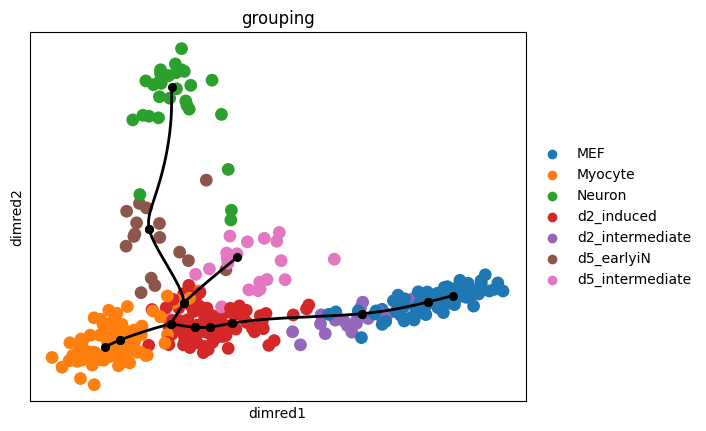

In [5]:
# 4. 绘制轨迹(dimred+plot)
cluster_list = dataset["grouping"]
# model = pdv.wrap.add_dimred(model, pdv.dimred.dimred_mds, expression_source=dataset["expression"])  # 提取降维结果
pdv.plot.plot_dimred(model, grouping=cluster_list)
logger.info("Result plotting finished")

                        INFO     Coloring by milestone                                                             
                        WARNING  The number of colors(13) is greater than the number of colors in the 'Set3'       
                                 palette(12), and the 'husl' palette selection is used.                            
                        DEBUG    selecting waypoints                                                               
[2025年02月12日 21时02分24秒] DEBUG    selecting waypoints shape is (1027, 355), finished!                         


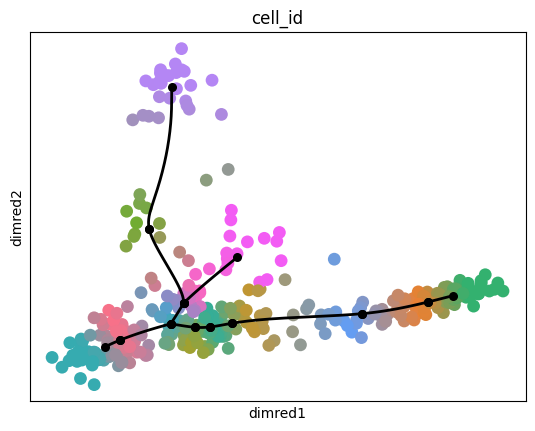

In [6]:
pdv.plot.plot_dimred(model)